# Try to map the shops on USA map

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#import geopandas
import geopy.distance
import math

import geopandas

#from shapely.geometry import Point
from sklearn.cluster import KMeans

In [2]:
states = geopandas.read_file("../Data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp")
states = states[states["NAME"] != "Alaska"]
states = states[states["NAME"] != "Hawaii"]
states = states[states["NAME"] != "Puerto Rico"]

In [3]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [4]:
states = states.to_crs("EPSG:3395")

<AxesSubplot:>

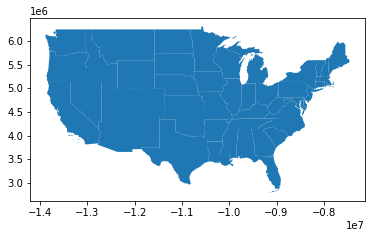

In [5]:
states.plot()

## Importing chipotle

In [6]:
chipotle = pd.read_csv("../Data/chipotle_stores.csv")
chipotle.head(10)

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220
5,Alabama,Hoover,"1759 Montgomery Hwy Hoover, AL 35244 US",33.378958,-86.803802
6,Alabama,Huntsville,"5900 University Dr NW Ste D2 Huntsville, AL 35...",34.742319,-86.665720
7,Alabama,Mobile,"3871 Airport Blvd Mobile, AL 36608 US",30.675338,-88.143754
8,Alabama,Mobile,"7765 Airport Blvd D100 Mobile, AL 36608 US",30.682731,-88.224998
9,Alabama,Montgomery,"2560 Berryhill Rd Ste C Montgomery, AL 36117 US",32.359177,-86.162253


In [7]:
chipotle.isnull().sum()

state        0
location     0
address      0
latitude     0
longitude    0
dtype: int64

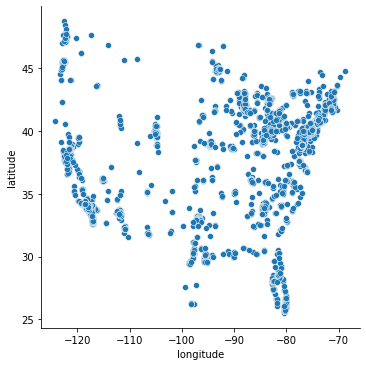

In [8]:
sns.relplot(data=chipotle, x="longitude", y="latitude")

In [9]:
chipotle.longitude.max()

-68.75374996916833

In [10]:
gdf = geopandas.GeoDataFrame(
    geometry=geopandas.points_from_xy(chipotle.longitude, chipotle.latitude))

In [11]:
gdf.head(10)

,geometry
0,POINT (-85.48733 32.60681)
1,POINT (-86.80276 33.50972)
2,POINT (-86.64744 33.59558)
3,POINT (-86.69828 33.42258)
4,POINT (-86.84122 34.15413)
5,POINT (-86.80380 33.37896)
6,POINT (-86.66572 34.74232)
7,POINT (-88.14375 30.67534)
8,POINT (-88.22500 30.68273)
9,POINT (-86.16225 32.35918)


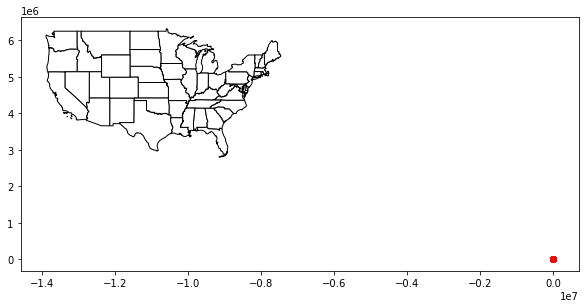

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

states.plot(ax = ax, edgecolor='black', color='white')

gdf.plot(ax=ax, color='red', alpha = 0.5)

plt.show()

#### Clustering

In [13]:
X=chipotle.loc[:,['latitude','longitude']]
X

,latitude,longitude
0,32.606813,-85.487328
1,33.509721,-86.802756
2,33.595581,-86.647437
3,33.422582,-86.698279
4,34.154134,-86.841220
...,...,...
2624,42.565892,-87.921048
2625,43.067723,-88.048222
2626,46.904247,-96.796618
2627,46.855337,-96.861416


In [14]:
n_cluster = len(chipotle["state"].unique())

In [15]:
id_n=37
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(X)
id_label=kmeans.labels_

In [16]:
#Getting the clusters center
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[  40.66816482,  -82.19180556],
       [  33.31917758, -111.88437399],
       [  32.87051306,  -96.92730487],
       [  37.12118003, -119.92359578],
       [  28.55000788,  -81.85864013],
       [  40.54419945,  -74.37412777],
       [  41.95613798,  -87.94666942],
       [  45.04610302, -122.70093045],
       [  33.86049366, -117.93630451],
       [  39.64634512, -105.04530226],
       [  34.16312606,  -84.06132215],
       [  45.0274582 ,  -93.35127972],
       [  39.57166134,  -94.86362838],
       [  42.42896787,  -71.14883824],
       [  38.79772342,  -76.98762119],
       [  29.70795566,  -98.03602302],
       [  35.70774433,  -79.60046719],
       [  39.41200368,  -84.84184896],
       [  26.24309957,  -80.42651427],
       [  34.94951263,  -90.68363633],
       [  29.97121219,  -95.38035195],
       [  36.06639951, -115.03324929],
       [  41.55512899, -111.53544455],
       [  40.66683732,  -79.98655365],
       [  33.36420883, -105.05868857],
       [  36.55309202,  -

In [17]:
cluster_centroids = pd.DataFrame(cluster_centers, columns=["latitude_centroid","longitude_centroid"])
cluster_centroids

,latitude_centroid,longitude_centroid
0,40.668165,-82.191806
1,33.319178,-111.884374
2,32.870513,-96.927305
3,37.121180,-119.923596
4,28.550008,-81.858640
5,40.544199,-74.374128
6,41.956138,-87.946669
7,45.046103,-122.700930
8,33.860494,-117.936305
9,39.646345,-105.045302


In [18]:
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
chipotle_clusters = chipotle.join(cluster_labels.to_frame())
chipotle_clusters

,state,location,address,latitude,longitude,cluster
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,30
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756,30
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437,30
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279,30
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220,36
...,...,...,...,...,...,...
2624,Wisconsin,Pleasant Prairie,"9370 76th St # B Pleasant Prairie, WI 53158 US",42.565892,-87.921048,6
2625,Wisconsin,Wauwatosa,"2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US",43.067723,-88.048222,6
2626,North Dakota,Fargo,"1204 19th Ave N Fargo, ND 58102 US",46.904247,-96.796618,11
2627,North Dakota,Fargo,"1680 45th St S Fargo, ND 58103 US",46.855337,-96.861416,11


In [19]:
colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

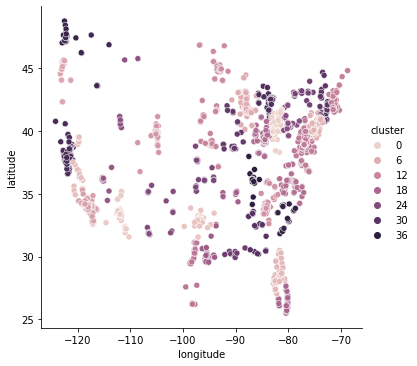

In [20]:
sns.relplot(data=chipotle_clusters, x="longitude", y="latitude", hue="cluster")

In [21]:
cluster_centroids["count"] = chipotle_clusters.groupby("cluster")["location"].count()

In [22]:
print(cluster_centroids.iloc[33])
chipotle_clusters[chipotle_clusters["cluster"] == 33]

latitude_centroid      44.845463
longitude_centroid   -116.095495
count                   6.000000
Name: 33, dtype: float64


,state,location,address,latitude,longitude,cluster
877,Idaho,Boise,"205 N Milwaukee St Boise, ID 83704 US",43.606686,-116.282300,33
878,Idaho,Boise,"305 S 6th St Boise, ID 83702 US",43.612668,-116.203094,33
879,Idaho,Boise,"7610 W State Street Suite 110 Boise, ID 83714 US",43.671261,-116.283033,33
880,Idaho,Meridian,"2126 N Eagle Rd Ste 100 Meridian, ID 83646 US",43.624164,-116.353787,33
1450,Montana,Missoula,"2995 N Reserve St Ste A&B Missoula, MT 59808 US",46.892179,-114.040016,33
2569,Washington,Spokane,"930 N Division St Spokane, WA 99202 US",47.665820,-117.410736,33


In [23]:
max_distance_list = []

for i in range(37):
    latitude_centroide = cluster_centroids.iloc[i][0]
    longitude_centroide = cluster_centroids.iloc[i][1]

    centroide = (latitude_centroide, longitude_centroide)

    working_df = chipotle_clusters[chipotle_clusters["cluster"] == i][["latitude", "longitude"]]

    max_distance = 0
    for j in range(working_df.shape[0]):
        latitude = working_df.iloc[j][0]
        longitude = working_df.iloc[j][1]

        point = (latitude, longitude)

        distance = geopy.distance.distance(centroide, point).km

        if distance > max_distance:
            max_distance = distance
    
    max_distance_list += [max_distance]

print(max_distance_list)

[264.0198281173126, 262.9789131441029, 272.7608243640362, 268.429912877563, 215.15813917327444, 147.51698617076838, 281.322354506527, 304.4273576203411, 197.8621500983853, 419.3628341586557, 209.08482667941811, 339.6006603892322, 342.56819743137555, 329.3412289243106, 242.16708116370089, 391.4644300236503, 238.09773894704654, 193.26132900025573, 157.17628139608271, 159.08426612102016, 327.26241882437785, 187.33908504178495, 527.6385111884206, 180.46098782299316, 356.82884027558543, 265.85827506365916, 220.58418770676255, 191.56689447238787, 299.19250323141165, 331.0528035903722, 228.75729840993466, 172.3872831492934, 371.20538475857256, 329.48135777531405, 263.02948629485724, 188.2967684519216, 222.07006098868362]


In [24]:
def area_circle(list):
    return [math.pi * i ** 2 for i in list]

areas = area_circle(max_distance_list)

In [29]:
df_area = pd.DataFrame(areas, columns=["area"])
cluster_centroids = cluster_centroids.join(df_area)
cluster_centroids


,latitude_centroid,longitude_centroid,count,0,area
0,40.668165,-82.191806,123,218989.332926,218989.332926
1,33.319178,-111.884374,83,217265.978093,217265.978093
2,32.870513,-96.927305,98,233729.678332,233729.678332
3,37.121180,-119.923596,26,226366.258966,226366.258966
4,28.550008,-81.858640,95,145433.826789,145433.826789
5,40.544199,-74.374128,234,68365.018347,68365.018347
6,41.956138,-87.946669,170,248632.765051,248632.765051
7,45.046103,-122.700930,36,291150.291242,291150.291242
8,33.860494,-117.936305,257,122991.563067,122991.563067
9,39.646345,-105.045302,81,552496.778476,552496.778476


In [30]:
cluster_centroids["shop_area_density"] = cluster_centroids["count"] / cluster_centroids["area"]

In [36]:
cluster_centroids["shop_area_density"].max()

0.0034228031478488598

In [37]:
cluster_centroids[cluster_centroids["shop_area_density"]==0.0034228031478488598]

,latitude_centroid,longitude_centroid,count,0,area,shop_area_density
5,40.544199,-74.374128,234,68365.018347,68365.018347,0.003423
